09:10

In [1]:
import torch
import torch.nn as nn

## Generownie danych losowych
Zacznijmy od utworzenia przykładowych danych za pomocą torch.
W danych poniżej X przedstawiono liczbę godzin studiowanych i czas spędzony przez studentów na spaniu, 
podczas gdy y reprezentują oceny.
Tworze tensory X i y.


In [2]:
X = torch.tensor(([2, 9,2], [1, 5,3], [3, 6,4], [4, 6,14], [4, 6,14]), dtype=torch.float) # 3 kolumny X 5 obserwacji
y = torch.tensor(([92], [100], [89], [77], [22]), dtype=torch.float) # 5 obserwacji wyników
xPredicted = torch.tensor(([4, 8,9, 5,2]), dtype=torch.float) # 1 X 2 tensor

In [3]:
y

tensor([[ 92.],
        [100.],
        [ 89.],
        [ 77.],
        [ 22.]])

Transponuje macierz

In [4]:
X

tensor([[ 2.,  9.,  2.],
        [ 1.,  5.,  3.],
        [ 3.,  6.,  4.],
        [ 4.,  6., 14.],
        [ 4.,  6., 14.]])

In [5]:
X

tensor([[ 2.,  9.,  2.],
        [ 1.,  5.,  3.],
        [ 3.,  6.,  4.],
        [ 4.,  6., 14.],
        [ 4.,  6., 14.]])

### xPredicted
Zmienna xPredicted jest pojedynczym wejściem, dla którego chcemy przewidzieć ocenę z wykorzystaniem parametrów wyuczonych przez sieć neuronową. Pamiętaj, że sieć neuronowa chce nauczyć się mapowania między X i y, więc spróbuje zgadywać z tego, czego nauczyła się z danych treningowych.

In [6]:
xPredicted

tensor([4., 8., 9., 5., 2.])

In [7]:
print(X.size())
print(y.size())
print(xPredicted.size())

torch.Size([5, 3])
torch.Size([5, 1])
torch.Size([5])


<div class="alert-success">
Sieć neuronowa do odpowiedniego działania potrzebuje poprawnie zdefiniowanych danych wejściowych. Istnieje wiele metod zapewnienia poprawności danych zależnie od ich charakteru oraz rodzaju sieci. Niezależnie od rodzaju sieci i problemu, który ma być rozwiązany, dane powinny spełniać podstawowe warunki, takie jak reprezentatywność, pełne oddanie problemu, odpowiednie przeskalowanie i normalizacja, eliminacja niedokładności pomiarów. Przeprowadzenie tych czynności jest niezbędne do poprawnego działania sieci.

Zauważ, że funkcja max zwraca zarówno tensor, jak i odpowiednie indeksy. Dlatego używamy _do przechwytywania wskaźników, których tutaj nie wykorzystamy, ponieważ interesują nas tylko maksymalne wartości do przeprowadzenia skalowania. Doskonale! Nasze dane są teraz w bardzo ładnym formacie, który nasza sieć neuronowa doceni później.

### Skalowanie i normalizacja
Dane przetwarzane przez sieć pochodzą najczęściej z obserwacji pewnych wartości w badanym modelu. Ich skala wartości zazwyczaj nie na bezpośrednie wprowadzenie na wejścia sieci. Istnieje kilka popularnych metod skalowania. Poniżej wymieniono najczęściej stosowane.

skalowanie względem wartości maksymalnej:
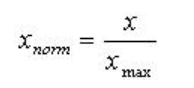


<div class="alert-success">
Skalowanie lub normalizacja danych to proces tworzenia danych modelu w standardowym formacie, dzięki czemu szkolenie jest ulepszone, dokładne i szybsze. Metoda skalowania danych w sieciach neuronowych jest podobna do normalizacji danych w dowolnym problemu uczenia maszynowego.

##### torch.max(X)
max po prostu wybiera największą wartość i ignoruje pozostałe, więc max jest operacją tożsamości dla tego jednego elementu. Dlatego gradient może przepływać przez nią tylko dla jednego elementu.

In [8]:
print('tensory przed skalowaniem')
print()
print(X)
print(y)

tensory przed skalowaniem

tensor([[ 2.,  9.,  2.],
        [ 1.,  5.,  3.],
        [ 3.,  6.,  4.],
        [ 4.,  6., 14.],
        [ 4.,  6., 14.]])
tensor([[ 92.],
        [100.],
        [ 89.],
        [ 77.],
        [ 22.]])


### Skalowanie względem wartości maksymalnej zmienych X
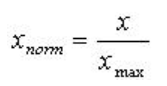

In [9]:
# scale units
X_max, _ = torch.max(X, 0)
X = torch.div(X, X_max)


print(X)

tensor([[0.5000, 1.0000, 0.1429],
        [0.2500, 0.5556, 0.2143],
        [0.7500, 0.6667, 0.2857],
        [1.0000, 0.6667, 1.0000],
        [1.0000, 0.6667, 1.0000]])


Skalowanie wartości y

In [10]:
xPredicted_max, _ = torch.max(xPredicted, 0)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100  # max test score is 100
print(xPredicted)

tensor([0.4444, 0.8889, 1.0000, 0.5556, 0.2222])


In [11]:
print(xPredicted)
print()
print(xPredicted_max)

tensor([0.4444, 0.8889, 1.0000, 0.5556, 0.2222])

tensor(9.)


In [12]:
print('Tensory po przeskalowaniu:')
print()
print(y)
print()
print(X)

Tensory po przeskalowaniu:

tensor([[0.9200],
        [1.0000],
        [0.8900],
        [0.7700],
        [0.2200]])

tensor([[0.5000, 1.0000, 0.1429],
        [0.2500, 0.5556, 0.2143],
        [0.7500, 0.6667, 0.2857],
        [1.0000, 0.6667, 1.0000],
        [1.0000, 0.6667, 1.0000]])


## Model (wykres obliczeniowy)

Po zeskalowaniu danych w odpowiednim formacie wystarczy teraz zdefiniować model. 
Dla celów ilustracyjnych budujemy następującą sieć neuronową lub wykres obliczeniowy:
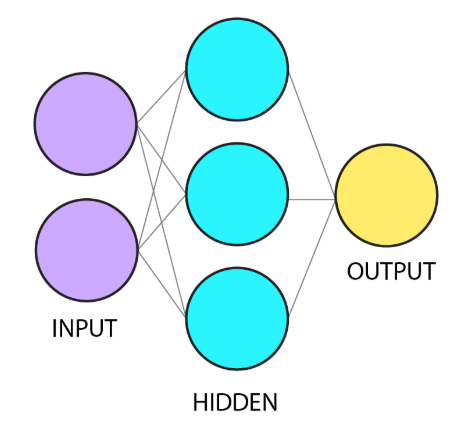

Po pierwsze, zdefiniowaliśmy nasz model za pomocą klasy, ponieważ jest to zalecany sposób na zbudowanie wykresu obliczeniowego. Nagłówek klasy zawiera nazwę klasy Neural Networki parametr, nn.Modulektóry zasadniczo wskazuje, że definiujemy naszą własną sieć neuronową.

In [13]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 3     # ---Tyle ile jest kolumn po trnspozycji macierzy X, kolumny reprezentują zmienne niezależne
        self.outputSize = 1
        self.hiddenSize = 3    # ---Tyle ile jest zmiennych niezależnych
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 3 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))      

### Inicjalizacja

Następnym krokiem jest zdefiniowanie inicjalizacji ( def __init__(self,)), które będą wykonywane po utworzeniu wystąpienia niestandardowej sieci neuronowej. Tutaj możesz zadeklarować parametry swojego modelu, ale zazwyczaj w tej sekcji zadeklarujesz strukturę swojej sieci - rozmiar ukrytych warstw i tak dalej. Ponieważ budujemy sieć neuronową od zera, wyraźnie zadeklarowaliśmy rozmiar macierzy wag: taką, która przechowuje parametry od wejściowej do ukrytej warstwy; i taki, który przechowuje parametr od warstwy ukrytej do wyjściowej. Obie macierze masy są inicjowane wartościami losowo wybranymi z rozkładu normalnego za pośrednictwem torch.randn(...). Pamiętaj, że nie używamy uprzedzeń tylko po to, aby maksymalnie uprościć sprawę.

### Funkcja forward (przekazywania)

Funkcja forward jest gdzie wszystko dzieje się magia (WARSTWA UKTYTA). W tym miejscu dane wchodzą i są wprowadzane do wykresu obliczeniowego (tj. Zbudowanej przez nas struktury sieci neuronowej). Ponieważ budujemy prostą sieć neuronową z jedną ukrytą warstwą, nasza funkcja przekazywania wygląda bardzo prosto:

Powyższa funkcja forward pobiera dane wejściowe, X a następnie wykonuje mnożenie macierzy ( torch.matmul(...)) z pierwszą macierzą wagi self.W1. Następnie wynik zastosowano funkcję aktywacyjnego sigmoid. Powstała macierz aktywacji jest następnie mnożona przez drugą macierz wagową self.W2. Następnie wykonywana jest kolejna aktywacja, która renderuje dane wyjściowe sieci neuronowej lub grafu obliczeniowego. Opisany powyżej proces jest po prostu tak zwany feedforward pass. Aby zoptymalizować wagi podczas treningu, potrzebujemy algorytmu propagacji wstecznej.

### Funkcja backward (wstecznej propagacji błędów)
Funkcja backward zawiera algorytm wstecznej propagacji błędów, w której celem jest przede wszystkim zminimalizować straty. Innymi słowy, wagi muszą zostać zaktualizowane w taki sposób, aby strata zmniejszała się podczas szkolenia sieci neuronowej. Cała ta magia jest możliwa dzięki algorytmowi spadku gradientu zadeklarowanemu w funkcji backward.

### Trening
Pozostało już tylko trenować sieć neuronową. Najpierw tworzymy instancję wykresu obliczeniowego, który właśnie zbudowaliśmy:

In [14]:
NN = Neural_Network()

Następnie trenujemy model do 1000 rund. Zauważ, że w PyTorch NN(X) automatycznie wywołuje funkcję forward, więc nie ma potrzeby jawnego wywoływania NN.forward(X).

Po uzyskaniu przewidywanego wyniku dla każdej rundy szkolenia, obliczamy stratę za pomocą następującego kodu:

In [15]:
torch.mean((y - NN(X))**2).detach().item()

0.15974314510822296

Następnym krokiem jest rozpoczęcie treningu (do przodu + do tyłu) przez NN.train(X, y). 
Po przeszkoleniu sieci neuronowej, możemy przechowywać model i moc przewidywana wartość pojedynczej instancji zadeklarowanej na początku xPredicted.

Poćwiczmy!

In [16]:
NN = Neural_Network()
for i in range(1000):  # trains the NN 1,000 times
    print ("#" + str(i) + " Loss: " + str(torch.mean((y - NN(X))**2).detach().item()))  # mean sum squared loss
    NN.train(X, y)
NN.saveWeights(NN)
NN.predict()

#0 Loss: 0.07215345650911331
#1 Loss: 0.07061001658439636
#2 Loss: 0.06928345561027527
#3 Loss: 0.06814143806695938
#4 Loss: 0.06715217977762222
#5 Loss: 0.06628651916980743
#6 Loss: 0.06551934778690338
#7 Loss: 0.06482986360788345
#8 Loss: 0.064201220870018
#9 Loss: 0.0636201873421669
#10 Loss: 0.06307651102542877
#11 Loss: 0.06256230175495148
#12 Loss: 0.06207162141799927
#13 Loss: 0.061599962413311005
#14 Loss: 0.06114395707845688
#15 Loss: 0.06070108339190483
#16 Loss: 0.06026949733495712
#17 Loss: 0.05984778329730034
#18 Loss: 0.0594349205493927
#19 Loss: 0.05903015285730362
#20 Loss: 0.058632899075746536
#21 Loss: 0.05824272707104683
#22 Loss: 0.05785934254527092
#23 Loss: 0.05748249962925911
#24 Loss: 0.05711197853088379
#25 Loss: 0.056747667491436005
#26 Loss: 0.056389473378658295
#27 Loss: 0.05603724718093872
#28 Loss: 0.0556909441947937
#29 Loss: 0.05535048246383667
#30 Loss: 0.055015791207551956
#31 Loss: 0.054686807096004486
#32 Loss: 0.05436350032687187
#33 Loss: 0.0540457

#266 Loss: 0.03537262976169586
#267 Loss: 0.035357601940631866
#268 Loss: 0.03534269332885742
#269 Loss: 0.03532790020108223
#270 Loss: 0.035313211381435394
#271 Loss: 0.03529863804578781
#272 Loss: 0.035284172743558884
#273 Loss: 0.03526982292532921
#274 Loss: 0.03525557741522789
#275 Loss: 0.03524143621325493
#276 Loss: 0.035227399319410324
#277 Loss: 0.035213470458984375
#278 Loss: 0.035199638456106186
#279 Loss: 0.03518592193722725
#280 Loss: 0.035172294825315475
#281 Loss: 0.03515876457095146
#282 Loss: 0.03514533489942551
#283 Loss: 0.03513201326131821
#284 Loss: 0.03511877730488777
#285 Loss: 0.035105638206005096
#286 Loss: 0.03509259968996048
#287 Loss: 0.035079650580883026
#288 Loss: 0.03506679832935333
#289 Loss: 0.03505402430891991
#290 Loss: 0.03504135459661484
#291 Loss: 0.03502877801656723
#292 Loss: 0.03501627594232559
#293 Loss: 0.035003867000341415
#294 Loss: 0.0349915511906147
#295 Loss: 0.03497931361198425
#296 Loss: 0.03496716544032097
#297 Loss: 0.03495510295033455

#528 Loss: 0.033415786921978
#529 Loss: 0.03341209888458252
#530 Loss: 0.03340842202305794
#531 Loss: 0.03340476006269455
#532 Loss: 0.03340112045407295
#533 Loss: 0.033397480845451355
#534 Loss: 0.03339386358857155
#535 Loss: 0.033390261232852936
#536 Loss: 0.03338667005300522
#537 Loss: 0.0333830900490284
#538 Loss: 0.03337952122092247
#539 Loss: 0.03337596729397774
#540 Loss: 0.0333724282681942
#541 Loss: 0.033368904143571854
#542 Loss: 0.033365391194820404
#543 Loss: 0.03336188942193985
#544 Loss: 0.033358410000801086
#545 Loss: 0.03335493430495262
#546 Loss: 0.03335147351026535
#547 Loss: 0.03334803134202957
#548 Loss: 0.03334458917379379
#549 Loss: 0.033341169357299805
#550 Loss: 0.03333776071667671
#551 Loss: 0.03333436697721481
#552 Loss: 0.03333097696304321
#553 Loss: 0.033327601850032806
#554 Loss: 0.033324241638183594
#555 Loss: 0.033320896327495575
#556 Loss: 0.03331755846738815
#557 Loss: 0.033314235508441925
#558 Loss: 0.033310920000076294
#559 Loss: 0.033307623118162155


#790 Loss: 0.03276984021067619
#791 Loss: 0.03276819735765457
#792 Loss: 0.03276655822992325
#793 Loss: 0.032764919102191925
#794 Loss: 0.0327632874250412
#795 Loss: 0.032761652022600174
#796 Loss: 0.03276003152132034
#797 Loss: 0.032758407294750214
#798 Loss: 0.03275678679347038
#799 Loss: 0.03275517746806145
#800 Loss: 0.03275356814265251
#801 Loss: 0.032751962542533875
#802 Loss: 0.032750360667705536
#803 Loss: 0.032748766243457794
#804 Loss: 0.032747168093919754
#805 Loss: 0.03274557739496231
#806 Loss: 0.032743994146585464
#807 Loss: 0.03274241089820862
#808 Loss: 0.03274083137512207
#809 Loss: 0.03273925930261612
#810 Loss: 0.03273769095540047
#811 Loss: 0.032736122608184814
#812 Loss: 0.03273456171154976
#813 Loss: 0.0327330008149147
#814 Loss: 0.032731443643569946
#815 Loss: 0.032729893922805786
#816 Loss: 0.032728347927331924
#817 Loss: 0.03272680193185806
#818 Loss: 0.032725267112255096
#819 Loss: 0.03272372484207153
#820 Loss: 0.032722193747758865
#821 Loss: 0.03272066265344

C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Neural_Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Predicted data based on trained weights: 
Input (scaled): 
tensor([0.4444, 0.8889, 1.0000, 0.5556, 0.2222])


RuntimeError: size mismatch, m1: [1 x 5], m2: [3 x 3] at C:\w\1\s\tmp_conda_3.6_095855\conda\conda-bld\pytorch_1579082406639\work\aten\src\TH/generic/THTensorMath.cpp:136

Strata maleje, co oznacza, że ​​sieć neuronowa czegoś się uczy. Otóż ​​to. Gratulacje! Właśnie nauczyłeś się tworzyć i trenować sieć neuronową od zera za pomocą PyTorch. Jest tak wiele rzeczy, które możesz zrobić z płytką siecią, którą właśnie wdrożyliśmy. Możesz dodać więcej ukrytych warstw lub spróbować zastosować warunki uprzedzeń dla praktyki. Chciałbym zobaczyć, co stąd zbudujesz. Skontaktuj się ze mną na Twitterze, jeśli masz dodatkowe pytania lub zostaw swoje komentarze tutaj. Do następnego razu!